In [492]:
import pandas as pd


import missingno
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [493]:
df = pd.read_csv("KAG_conversion_data.csv")

In [494]:
type(df)

pandas.core.frame.DataFrame

In [495]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [496]:
df.rename(columns = {'ad_id': 'id_anuncio', 'xyz_campaign_id': 'id_campanha', 'fb_campaign_id': 'id_fb_campanha',
                     'age': 'idade', 'gender': 'genero', 'interest': 'interesse', 'Impressions': 'numero_exibicoes',
                     'Clicks': 'cliques_no_anuncio', 'Spent': 'valor_pago_anuncio', 'Total_Conversion': 'conversao',
                     'Approved_Conversion': 'compras'}, inplace = True)

In [497]:
df.tail()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


In [498]:
df.columns

Index(['id_anuncio', 'id_campanha', 'id_fb_campanha', 'idade', 'genero',
       'interesse', 'numero_exibicoes', 'cliques_no_anuncio',
       'valor_pago_anuncio', 'conversao', 'compras'],
      dtype='object')

In [499]:
df.index

RangeIndex(start=0, stop=1143, step=1)

In [500]:
df.shape

(1143, 11)

In [501]:
df.info

<bound method DataFrame.info of       id_anuncio  id_campanha  ...  conversao compras
0         708746          916  ...          2       1
1         708749          916  ...          2       0
2         708771          916  ...          1       0
3         708815          916  ...          1       0
4         708818          916  ...          1       1
...          ...          ...  ...        ...     ...
1138     1314410         1178  ...         13       2
1139     1314411         1178  ...          3       0
1140     1314412         1178  ...          2       0
1141     1314414         1178  ...          8       2
1142     1314415         1178  ...          5       2

[1143 rows x 11 columns]>


### dados estatisticos



In [502]:
df.describe()

,id_anuncio,id_campanha,id_fb_campanha,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [503]:
df.describe(include="all")

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
count,1.143000e+03,1143.000000,1143.000000,1143,1143,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
unique,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,30-34,M,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,426,592,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.872611e+05,1067.382327,133783.989501,NaN,NaN,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,NaN,NaN,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,NaN,NaN,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,NaN,NaN,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,NaN,NaN,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,NaN,NaN,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000


### dados faltantes

In [504]:
df.isnull().sum()

id_anuncio            0
id_campanha           0
id_fb_campanha        0
idade                 0
genero                0
interesse             0
numero_exibicoes      0
cliques_no_anuncio    0
valor_pago_anuncio    0
conversao             0
compras               0
dtype: int64

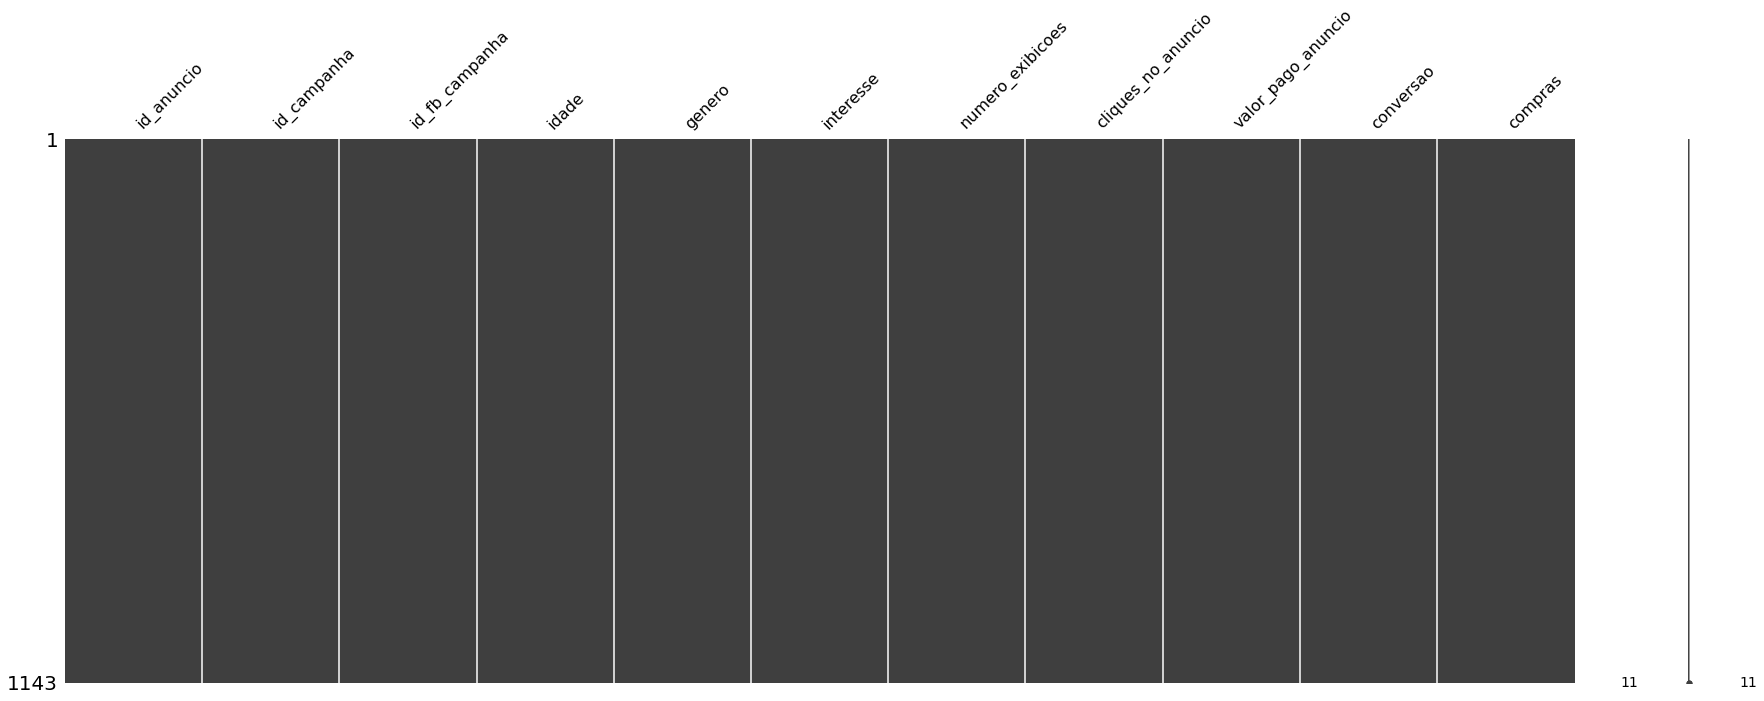

In [505]:
missingno.matrix(df, figsize=(30,10))



### Outliers


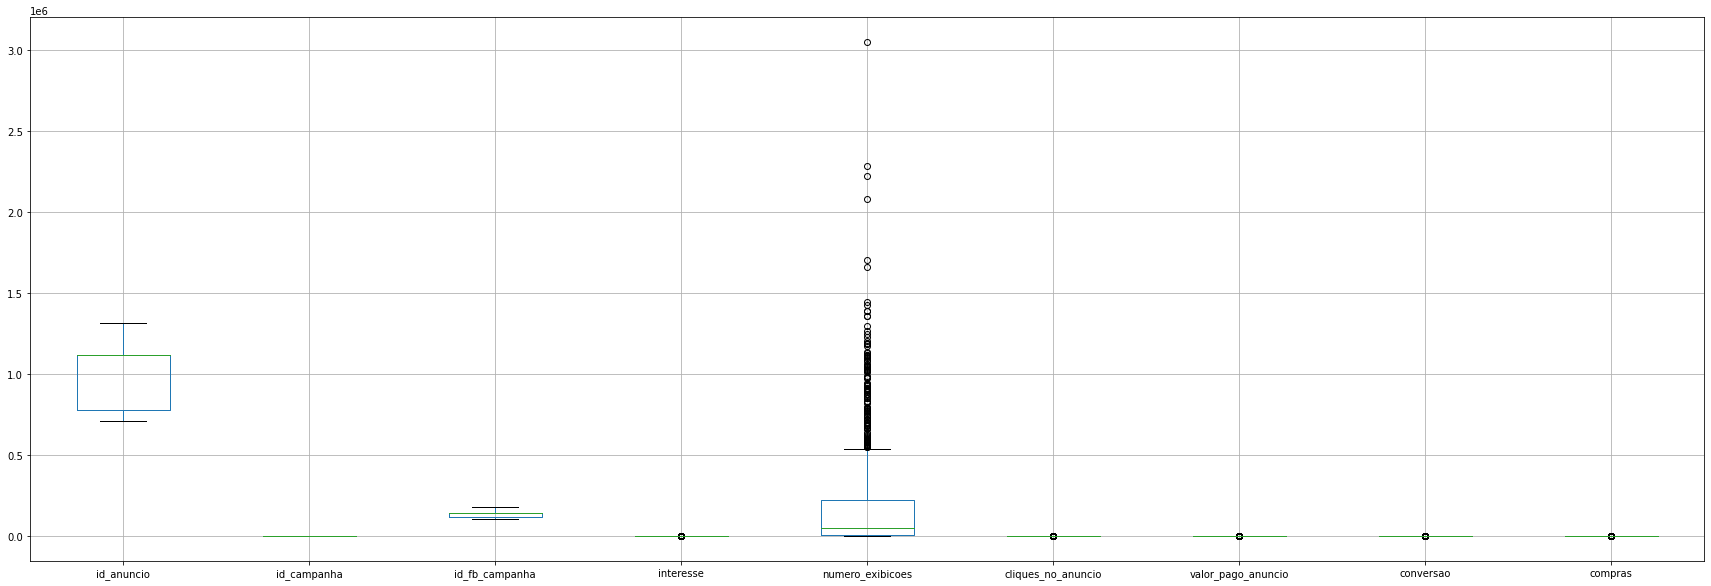

In [506]:
plt.figure(figsize=(30,10))
df.boxplot()
plt.show()

### Duplicatas



In [507]:
df[df.duplicated()]

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras


### Matriz correlação

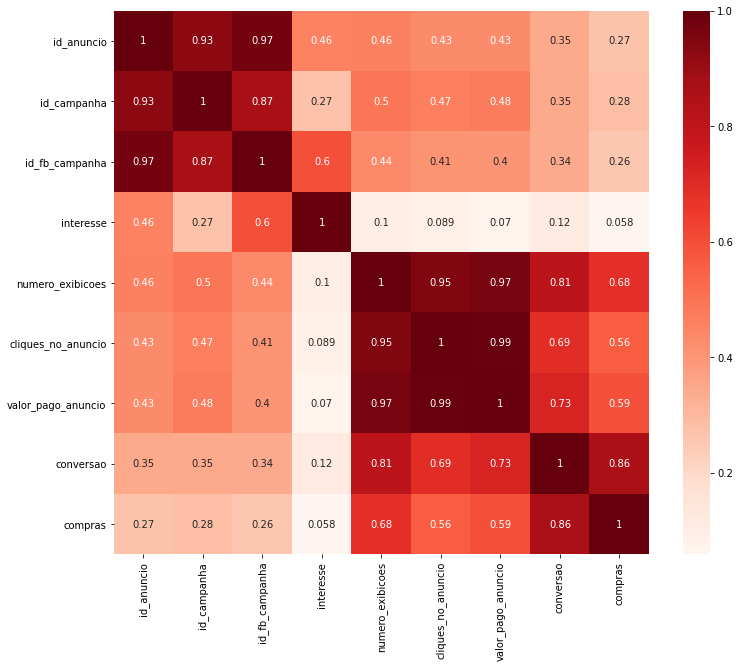

In [508]:
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

Avaliando as Features

In [509]:
df["id_campanha"].nunique()

3

In [510]:
df["id_campanha"].unique()

array([ 916,  936, 1178])

In [511]:
df["id_campanha"].replace({916:"campanha_1", 936: "campanha_2", 1178: "campanha_3"}, inplace=True)

In [512]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
0,708746,campanha_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campanha_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,30-34,M,28,4133,1,1.29,1,1


In [513]:
df.tail()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
1138,1314410,campanha_3,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,campanha_3,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,campanha_3,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,campanha_3,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,campanha_3,179982,45-49,F,114,513161,114,165.609999,5,2


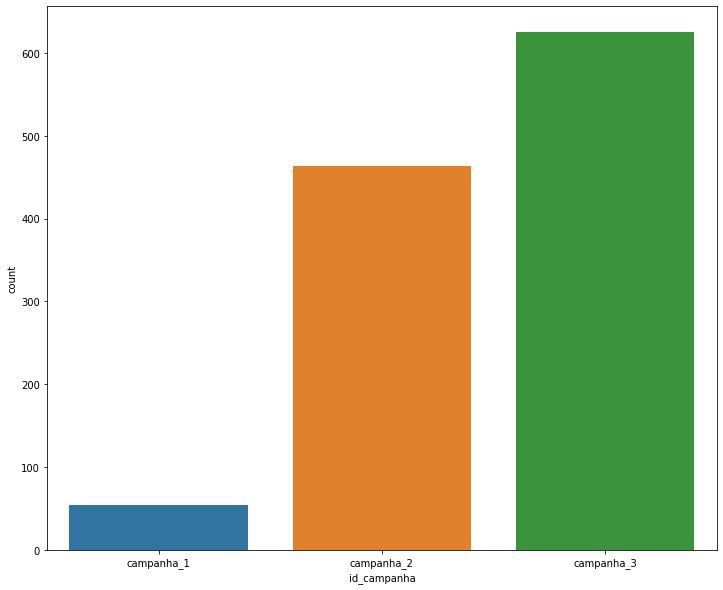

In [514]:
plt.figure(figsize=(12,10))
sns.countplot(x="id_campanha", data=df)
plt.show()

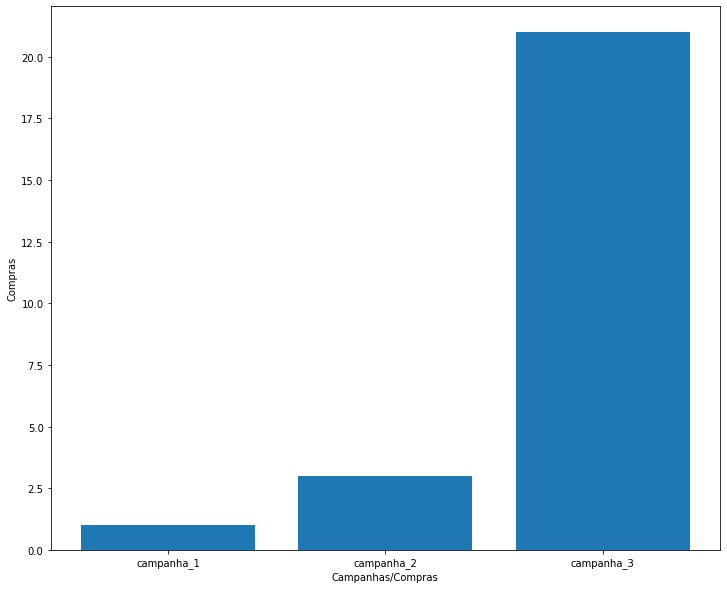

In [515]:
plt.figure(figsize=(12,10))
plt.bar(df["id_campanha"], df["compras"])
plt.ylabel("Compras")
plt.xlabel("Campanhas/Compras")
plt.show()

### idade- idade da pessoa a quem o anúncio é mostrado




In [516]:
df["idade"].nunique()

4

In [517]:
df["idade"].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

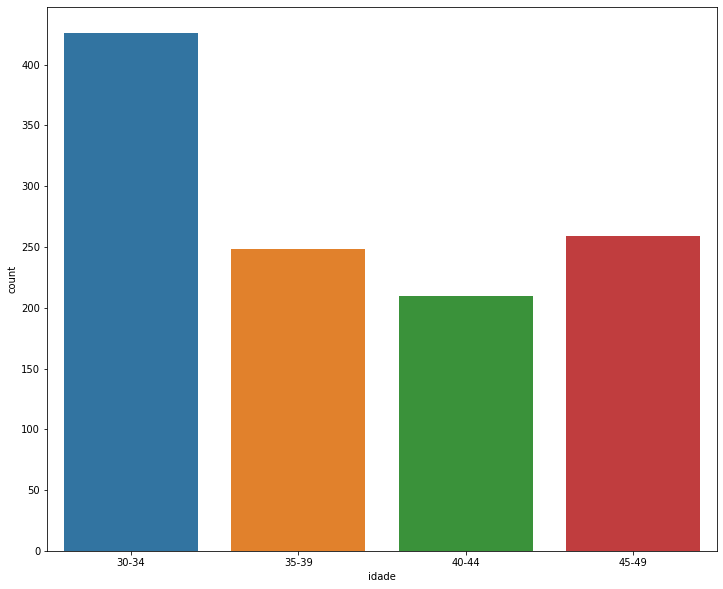

In [518]:
plt.figure(figsize=(12,10))
sns.countplot(x = "idade", data=df)
plt.show()

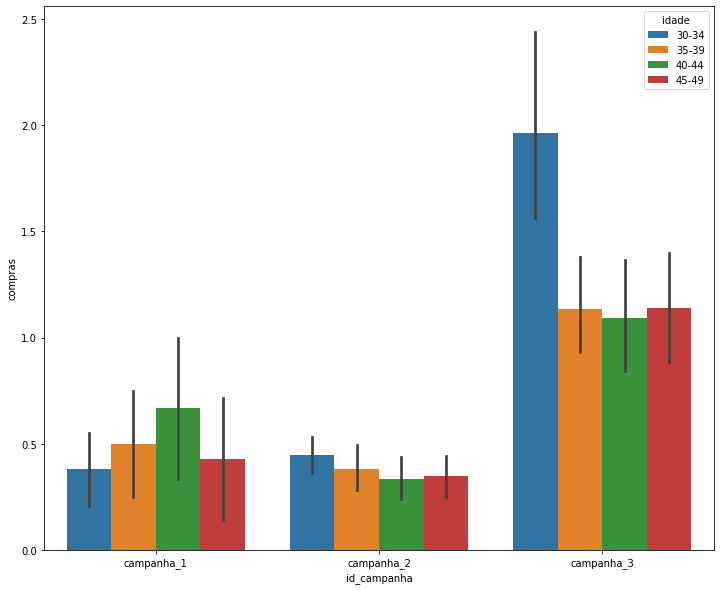

In [519]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=df["id_campanha"], y=df["compras"], hue=df["idade"], data=tips)
plt.show()

Na campanha_3 e campanha_2 o grupo de 30-34 anos mostra mais interesse

Na campanha_1 o grupo de 40-44 anos mostra mais interesse

### Gênero - sexo da pessoa que deseja que o anuncio seja mostrado

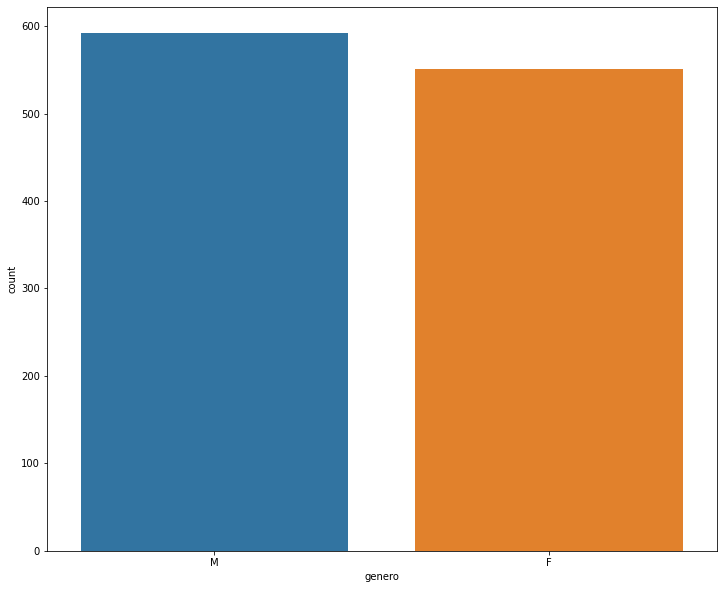

In [520]:
plt.figure(figsize=(12,10))
sns.countplot(x= "genero", data=df)
plt.show()

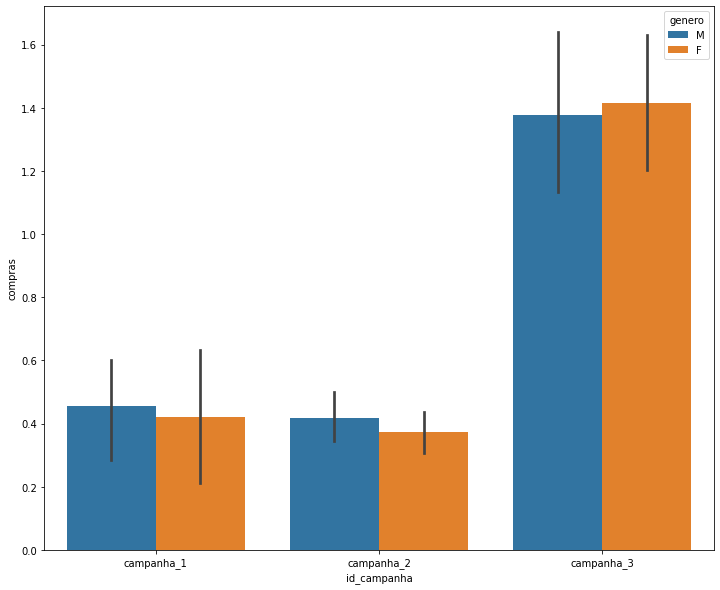

In [521]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=df["id_campanha"], y=df["compras"], hue=df["genero"], data=tips)
plt.show()

### modelagem/Machine Learning

In [522]:
df.shape

(1143, 11)

In [523]:
amostra_df = df.sample(n=20)

In [524]:
amostra_df.shape

(20, 11)

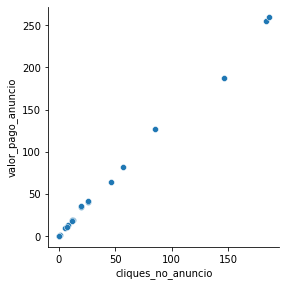

In [525]:
sns.pairplot(amostra_df, x_vars=["cliques_no_anuncio"], y_vars=["valor_pago_anuncio"], height=4, kind="scatter")
plt.show()

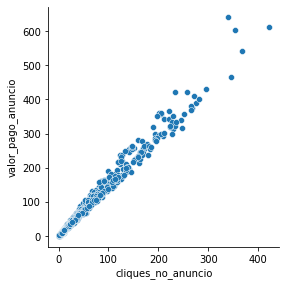

In [526]:
sns.pairplot(df, x_vars=["cliques_no_anuncio"], y_vars=["valor_pago_anuncio"], height=4, kind="scatter")
plt.show()

In [527]:
df = df.replace('30-34',0.0011)
df = df.replace('35-39',0.0012)
df = df.replace('40-44',0.0013)
df = df.replace('45-49',0.0014)
df = df.replace('M',1)
df = df.replace('F',0)

In [528]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
0,708746,campanha_1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha_1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,0.0011,1,28,4133,1,1.29,1,1


In [529]:
X = df[['idade', 'genero', 'interesse', 'numero_exibicoes', 'cliques_no_anuncio']]

In [530]:
y = df['valor_pago_anuncio']

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [532]:
X_train.head()

,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio
640,0.0012,1,21,271091,42
852,0.0011,0,24,185665,39
311,0.0013,1,29,10090,2
803,0.0014,1,29,563074,86
105,0.0014,0,10,73634,23


In [533]:
y_train.head()

640     78.040000
852     62.140001
311      2.650000
803    142.709999
105     32.980000
Name: valor_pago_anuncio, dtype: float64

In [534]:
model = LinearRegression()

In [535]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [536]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [537]:
model.coef_

array([ 1.11543951e+04,  2.54714226e+00, -6.87113770e-02,  8.85162529e-05,
        1.06012421e+00])

In [538]:
model.intercept_

-13.191111867749427

In [539]:
model.score(X_test, y_test)

0.994899077013531

### Predição para campanhas no Facebook

In [540]:
idade = float(input("Idade: "))
genero = int(input("Gênero: "))
interesse = int(input("Interesse: "))
numero_exibicoes = int(input("Exibições: "))
cliques_no_anuncio = int(input("Cliques: "))

Idade: 0.0014
Gênero: 1
Interesse: 28
Exibições: 7000
Cliques: 1


In [541]:
pred = model.predict([[idade, genero, interesse, numero_exibicoes, cliques_no_anuncio]])

In [542]:
print(pred)

[4.72800293]
